<a href="https://colab.research.google.com/github/hamydang16/Data-Analysis/blob/main/Ask_A_Manager_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


#Set palette for visualization
#palette = ["#1B6930","#4E8227","#988B34","#AD5543","#B75C8B","#AF7ABD","#9A96C5","#B0C3CF","#C8DAD4","#DFE7DF","#F5F6F4"]
palette = ["#625E97","#83A7B9","#AED6C6","#AA976F","#C89899"]
sns.set_palette(palette)
#display option
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ask-a-manager-cleaned.csv')

In [4]:
df.head()

,Timestamp,Age range,Industry,Job title,Annual salary,Additional monetary compensation,Currency,Country,State,City,YOE (Overall),YOE (Field),Eduacation (Highest complete),Gender,Race
0,2021-04-27 11:02:09.743,25-34,education (higher education),research and instruction librarian,55000,0.00,USD,united states,massachusetts,Boston,5 - 7,5 - 7,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,computing or tech,change & internal communications manager,54600,"4,000.00",GBP,united kingdom,NaN,Cambridge,8 - 10,5 - 7,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"accounting, banking & finance",marketing specialist,34000,NaN,USD,united states,tennessee,Chattanooga,2 - 4,2 - 4,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,nonprofits,program manager,62000,"3,000.00",USD,united states,wisconsin,Milwaukee,8 - 10,5 - 7,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"accounting, banking & finance",accounting manager,60000,"7,000.00",USD,united states,south carolina,Greenville,8 - 10,5 - 7,College degree,Woman,White


In [10]:
#Only analyze data from the US and currency is usd
df_us = df[(df['Country'] == 'united states') & (df['Currency'] == 'USD') ]
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23118 entries, 0 to 27898
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Timestamp                         23118 non-null  object 
 1   Age range                         23118 non-null  object 
 2   Industry                          23118 non-null  object 
 3   Job title                         23117 non-null  object 
 4   Annual salary                     23118 non-null  int64  
 5   Additional monetary compensation  17337 non-null  float64
 6   Currency                          23118 non-null  object 
 7   Country                           23118 non-null  object 
 8   State                             22945 non-null  object 
 9   City                              23056 non-null  object 
 10  YOE (Overall)                     23118 non-null  object 
 11  YOE (Field)                       23118 non-null  object 
 12  Eduacatio

# Data cleaning

## Null values

In [11]:
df_us.isnull().sum()

,0
Timestamp,0
Age range,0
Industry,0
Job title,1
Annual salary,0
Additional monetary compensation,5781
Currency,0
Country,0
State,173
City,62


In [17]:
#Replace nan in additional monetary column with 0
df_us['Additional monetary compensation'] = df_us['Additional monetary compensation'].fillna(0)
#Create a new total comp column
df_us['TotalComp'] = df_us['Annual salary'] + df_us['Additional monetary compensation']

In [19]:
#drop na in this dataset
df_us.dropna(inplace=True)

In [21]:
df_us.head()

,Timestamp,Age range,Industry,Job title,Annual salary,Additional monetary compensation,Currency,Country,State,City,YOE (Overall),YOE (Field),Eduacation (Highest complete),Gender,Race,TotalComp
0,2021-04-27 11:02:09.743,25-34,education (higher education),research and instruction librarian,55000,0.00,USD,united states,massachusetts,Boston,5 - 7,5 - 7,Master's degree,Woman,White,"55,000.00"
2,2021-04-27 11:02:38.125,25-34,"accounting, banking & finance",marketing specialist,34000,0.00,USD,united states,tennessee,Chattanooga,2 - 4,2 - 4,College degree,Woman,White,"34,000.00"
3,2021-04-27 11:02:40.643,25-34,nonprofits,program manager,62000,"3,000.00",USD,united states,wisconsin,Milwaukee,8 - 10,5 - 7,College degree,Woman,White,"65,000.00"
4,2021-04-27 11:02:41.793,25-34,"accounting, banking & finance",accounting manager,60000,"7,000.00",USD,united states,south carolina,Greenville,8 - 10,5 - 7,College degree,Woman,White,"67,000.00"
5,2021-04-27 11:02:45.571,25-34,education (higher education),scholarly publishing librarian,62000,0.00,USD,united states,new hampshire,Hanover,8 - 10,2 - 4,Master's degree,Man,White,"62,000.00"


## Remove duplicates

In [22]:
df_us.duplicated().sum()

0

## Outliers

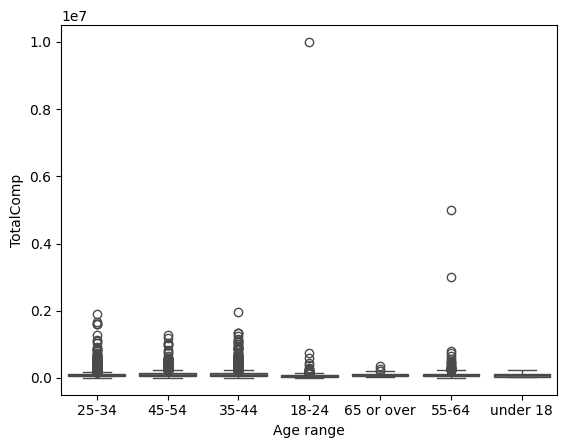

In [39]:
#Plot total comp by the top 10 industry in total comp
sns.boxplot(x='Age range', y='TotalComp', data=df_us);

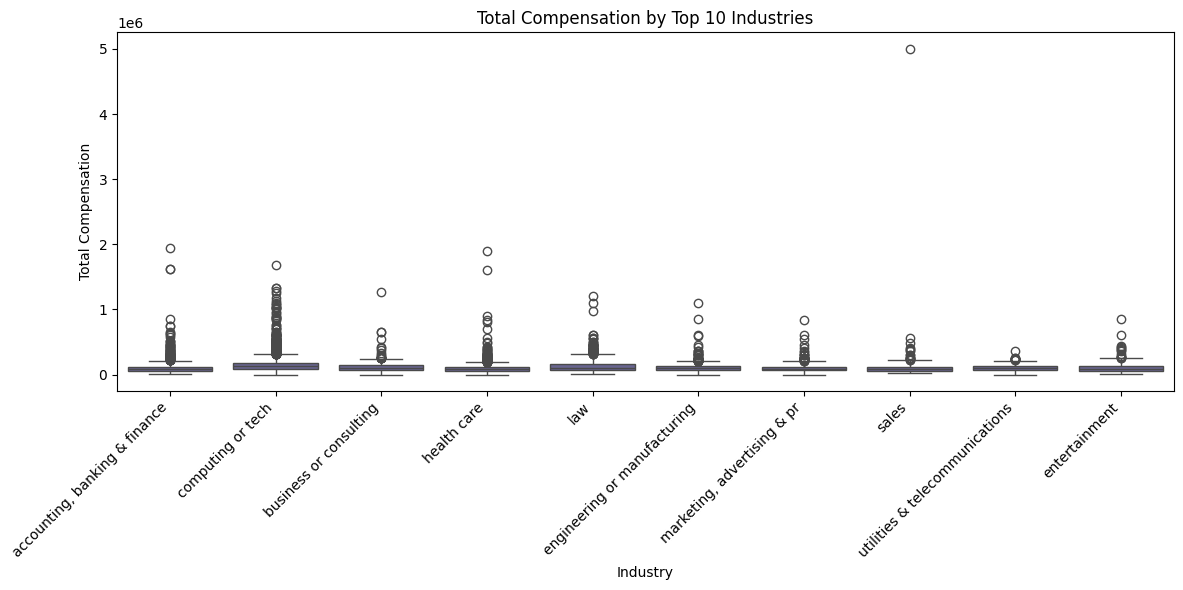

In [41]:

# Calculate the top 10 industries by total compensation
top_10_industries = df_us.groupby('Industry')['TotalComp'].mean().nlargest(10).index

# Filter the DataFrame to include only the top 10 industries
df_top_10 = df_us[df_us['Industry'].isin(top_10_industries)]

# Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='TotalComp', data=df_top_10)
plt.xticks(rotation=45, ha='right')
plt.title('Total Compensation by Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Total Compensation')
plt.tight_layout()
plt.show()


In [23]:
df_us.shape

(22557, 16)

# Exploratory Data Analysis

We have subset the data to only employees within the US and receving payments in USD. Next, we will look at some of the questions we would like to find the answers to.

## Industrial compensation

**Question: Which industry pays the most?**

<Axes: title={'center': 'Average Industry Compensation'}, xlabel='Industry'>

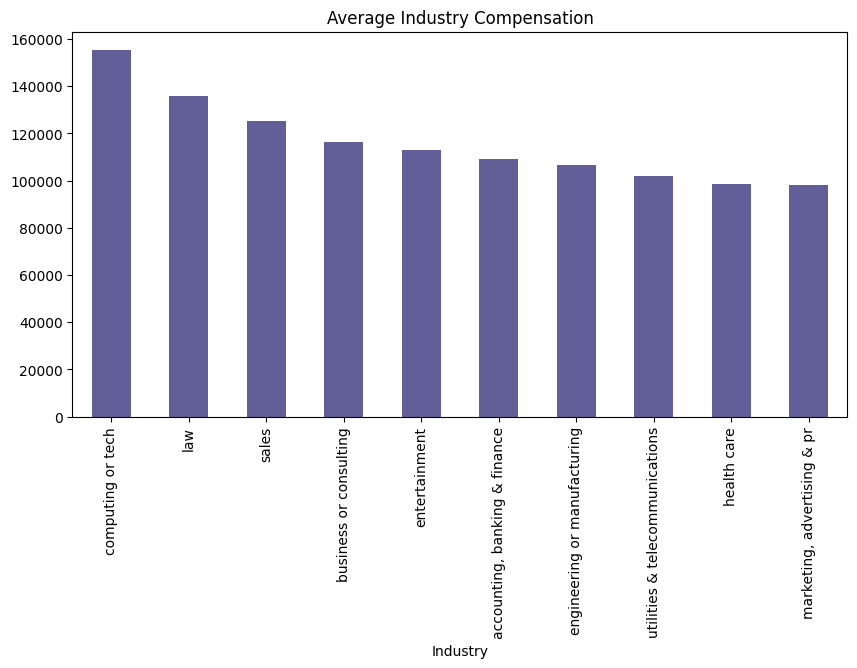

In [29]:
#Group by top ten average industry
top_10_industry = df_us.groupby('Industry')['TotalComp'].mean().sort_values(ascending=False).head(10)
#Visualize
top_10_industry.plot(kind='bar', figsize=(10,5), title='Average Industry Compensation');

## Salary vs. Experience

**Question: How does salary increase with experience?**


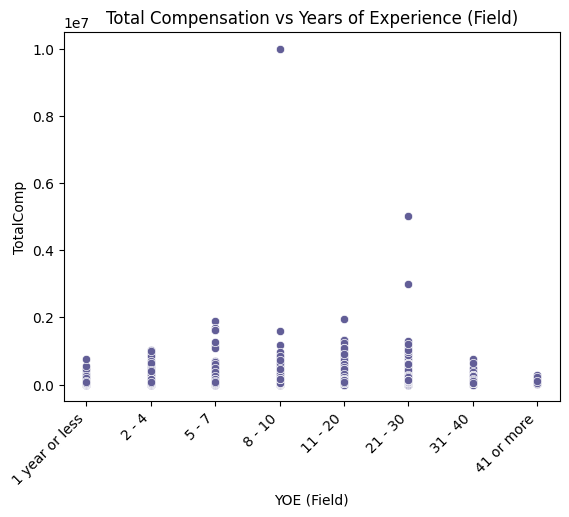

In [56]:
#order of category
category_order = ['1 year or less', '2 - 4', '5 - 7', '8 - 10', '11 - 20', '21 - 30', '31 - 40', '41 or more']
df_us['YOE (Field)'] = pd.Categorical(df_us['YOE (Field)'], categories=category_order, ordered=True)
df_us.sort_values('YOE (Field)')

#plot total comp vs yoe
sns.scatterplot(x='YOE (Field)', y='TotalComp', data=df_us)
plt.xticks(rotation=45, ha='right');
plt.title('Total Compensation vs Years of Experience (Field)');


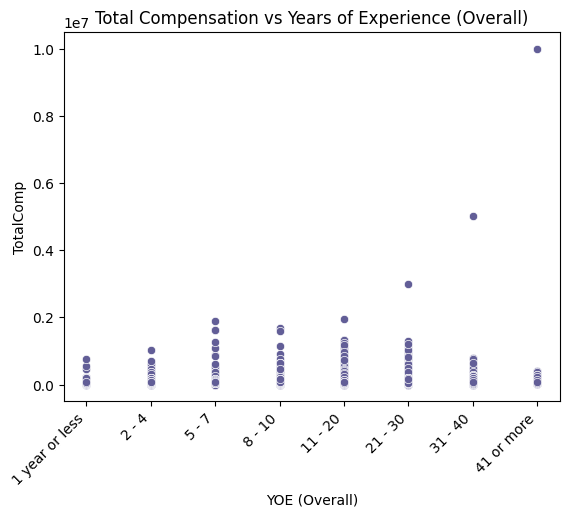

In [55]:
#order of category
category_order = ['1 year or less', '2 - 4', '5 - 7', '8 - 10', '11 - 20', '21 - 30', '31 - 40', '41 or more']
df_us['YOE (Overall)'] = pd.Categorical(df_us['YOE (Overall)'], categories=category_order, ordered=True)
df_us.sort_values('YOE (Overall)')

#plot total comp vs yoe
sns.scatterplot(x='YOE (Overall)', y='TotalComp', data=df_us)
plt.xticks(rotation=45, ha='right');
plt.title('Total Compensation vs Years of Experience (Overall)');


## Salary vs. Location

**Question: How do salaries for the same role vary by location?**

## Salary vs. Demographical

**Question: How do salaries differ by gender & experience?**

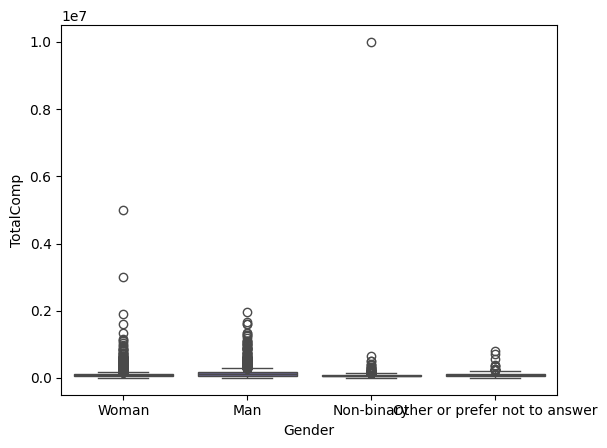

In [57]:
#box plot of total comp by gender
sns.boxplot(x='Gender', y='TotalComp', data=df_us);